# Фильтрация картинок при помощи pytorch torch.nn.Conv2d

Прочитайте внимательно статью про то, что такое свёртка:

https://programforyou.ru/poleznoe/convolutional-network-from-scratch-part-zero-introduction

In [1]:
import torch
import torch.nn as nn
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt

Пусть задана цветная картинка с изображением бабочки:

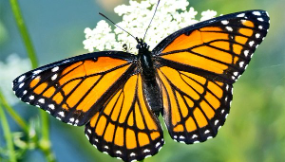

In [2]:
filename = 'image.png'
image = Image.open(filename)
image = image.convert('RGB')
image

Цель задания в том, чтобы реализовать функцию, которая бы по заданным входному изображению и матрицей размера 3x3, получала бы фильтрованное изображение, как на рисунке ниже:

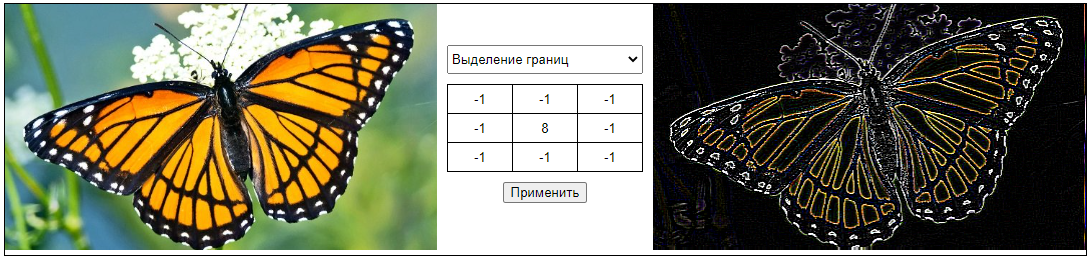

In [3]:
filename = 'laplace filter.png'
filter_example = Image.open(filename)
filter_example = filter_example.convert('RGB')
filter_example

Для реализации фильтра необходимо использовать свёртку, которая осуществляется модулем 'torch.nn.Conv2d'. В созданном объекте необходимо заменить имеющиеся веса на заданные веса фильтра, как в примере ниже:

In [4]:
conv_model = nn.Conv2d(in_channels=3, out_channels=1, kernel_size=3, 
                       padding=2, stride=1, bias=False) # конволюционный слой
print('Исходные случайные веса в слое:')
print(conv_model.weight)

Исходные случайные веса в слое:
Parameter containing:
tensor([[[[ 0.0251,  0.1780, -0.1012],
          [ 0.1300, -0.0565,  0.1187],
          [ 0.1351, -0.0275, -0.1537]],

         [[ 0.0484, -0.1094,  0.0569],
          [ 0.0618, -0.1116, -0.1264],
          [ 0.1068,  0.1175,  0.0635]],

         [[-0.1056,  0.0938,  0.0717],
          [-0.1299, -0.1753, -0.1634],
          [-0.0825, -0.0536,  0.1877]]]], requires_grad=True)


In [5]:
W = torch.tensor([[[0.,0,0],[0,1,0],[0,0,0]], 
                  [[0.,0,0],[0,0,0],[0,0,0]],
                  [[0.,0,0],[0,0,0],[0,0,0]]])

with torch.no_grad():
    conv_model.weight.copy_(W)

print('Новые веса в слое:')
print(conv_model.weight)

Новые веса в слое:
Parameter containing:
tensor([[[[0., 0., 0.],
          [0., 1., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]]], requires_grad=True)


Также необходимо научиться использовать стандартные трансформации из модуля 'torchvision.transforms' для того, чтобы преобразовывать картинку из формата, возвращаемого библиотекой 'PIL.Image' в 'torch.Tensor':
- transforms.ToTensor()
- transforms.ToPILImage()

In [6]:
t1 = transforms.ToTensor()
tensor_image = t1(image)
tensor_image.shape

torch.Size([3, 162, 285])

In [7]:
tensor_image = tensor_image.unsqueeze(dim=0)
tensor_image.shape

torch.Size([1, 3, 162, 285])

In [8]:
result = conv_model(tensor_image)
#result

In [9]:
result.shape

torch.Size([1, 1, 164, 287])

In [10]:
result = result.squeeze(dim=0)
result.shape

torch.Size([1, 164, 287])

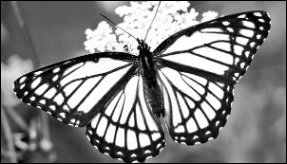

In [11]:
t2 = transforms.ToPILImage()
new_image = t2(result)
new_image

В данном примере преобразования привели к чёрно-белой одно-канальной картинке. Ваша же задача состоит в том, чтобы картинка после применения фильтра оставалась цветной трёх-канальной, а фильтр применялся к каждому из каналов по-отдельности.

Более того, результат применения фильтров должен совпадать с теми, что показаны в статье (ссылка на статью в самом вверху).

# Домашняя работа

In [12]:
def Filter(image, W):
    
    conv_model = nn.Conv2d(in_channels = 3, out_channels = 3, groups = 3, kernel_size = 3, 
                           padding = 1, stride = 1, bias = False)
    
    with torch.no_grad():
        conv_model.weight.copy_(W)
        
    t1 = transforms.ToTensor()
    tensor_image = t1(image)
    tensor_image = tensor_image.unsqueeze(dim=0)
    result = conv_model(tensor_image)
    result = result.squeeze(dim=0)
    result[result < 0] = 0
    result[result > 1] = 1
    t2 = transforms.ToPILImage()
    new_image = t2(result)
    
    return new_image

## Посмотрим на результат применения фильтров из статьи

### Оригинальное изображение:

In [13]:
original = torch.tensor([[[[0,0,0],[0,1,0],[0,0,0]]], 
                         [[[0,0,0],[0,1,0],[0,0,0]]],
                         [[[0,0,0],[0,1,0],[0,0,0]]]])

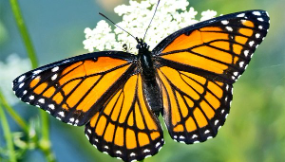

In [14]:
Filter(image, original)

### Выделение границ по X

In [15]:
borders_X = torch.tensor([[[[-1,-2,-1],[0,0,0],[1,2,1]]], 
                          [[[-1,-2,-1],[0,0,0],[1,2,1]]],
                          [[[-1,-2,-1],[0,0,0],[1,2,1]]]])

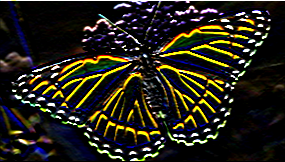

In [16]:
Filter(image, borders_X)

### Выделение границ по Y

In [17]:
borders_Y = torch.tensor([[[[-1,0,1],[-2,0,2],[-1,0,1]]], 
                          [[[-1,0,1],[-2,0,2],[-1,0,1]]],
                          [[[-1,0,1],[-2,0,2],[-1,0,1]]]])

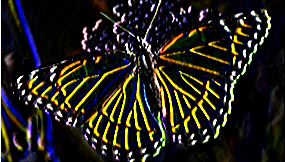

In [18]:
Filter(image, borders_Y)

### Выделение границ

In [19]:
borders = torch.tensor([[[[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]], 
                        [[[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]],
                        [[[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]]])

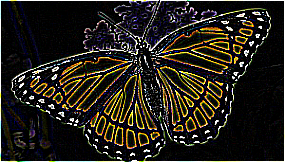

In [20]:
Filter(image, borders)

### Повышение резкости

In [21]:
sharpness = torch.tensor([[[[-1/6,-4/6,-1/6],[-4/6,26/6,-4/6],[-1/6,-4/6,-1/6]]], 
                          [[[-1/6,-4/6,-1/6],[-4/6,26/6,-4/6],[-1/6,-4/6,-1/6]]],
                          [[[-1/6,-4/6,-1/6],[-4/6,26/6,-4/6],[-1/6,-4/6,-1/6]]]])

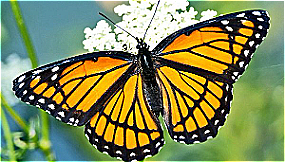

In [22]:
Filter(image, sharpness)

### Размытие

In [23]:
blur = torch.tensor([[[[0.1,0.1,0.1],[0.1,0.1,0.1],[0.1,0.1,0.1]]], 
                     [[[0.1,0.1,0.1],[0.1,0.1,0.1],[0.1,0.1,0.1]]],
                     [[[0.1,0.1,0.1],[0.1,0.1,0.1],[0.1,0.1,0.1]]]])

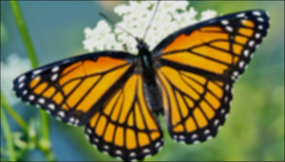

In [24]:
Filter(image, blur)

### Размытие Гаусса

In [25]:
Gaussian_blur = torch.tensor([[[[0.05,0.1,0.05],[0.1,0.2,0.1],[0.05,0.1,0.05]]], 
                              [[[0.05,0.1,0.05],[0.1,0.2,0.1],[0.05,0.1,0.05]]],
                              [[[0.05,0.1,0.05],[0.1,0.2,0.1],[0.05,0.1,0.05]]]])

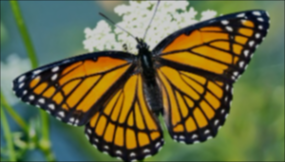

In [26]:
Filter(image, Gaussian_blur)

## Попробуем создать другие фильтры

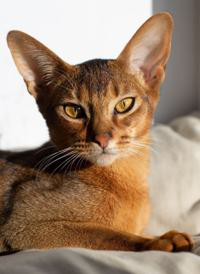

In [27]:
filename = 'cat.jpeg'
cat = Image.open(filename)
cat = cat.convert('RGB')
cat

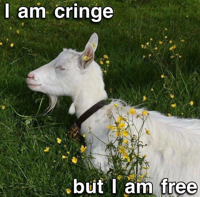

In [28]:
filename = 'goat.jpeg'
goat = Image.open(filename)
goat = goat.convert('RGB')
goat = goat.resize((200, int(goat.height * (200 / goat.width))))
goat

In [29]:
cat, goat

(<PIL.Image.Image image mode=RGB size=200x274>,
 <PIL.Image.Image image mode=RGB size=200x197>)

In [30]:
red = torch.tensor([[[[0,0,0],[0,1,0],[0,0,0]]], 
                    [[[0,0,0],[0,0,0],[0,0,0]]],
                    [[[0,0,0],[0,0,0],[0,0,0]]]])

green = torch.tensor([[[[0,0,0],[0,0,0],[0,0,0]]], 
                      [[[0,0,0],[0,1,0],[0,0,0]]],
                      [[[0,0,0],[0,0,0],[0,0,0]]]])

blue = torch.tensor([[[[0,0,0],[0,0,0],[0,0,0]]], 
                     [[[0,0,0],[0,0,0],[0,0,0]]],
                     [[[0,0,0],[0,1,0],[0,0,0]]]])

yellow = torch.tensor([[[[0,0,0],[0,1,0],[0,0,0]]], 
                       [[[0,0,0],[0,1,0],[0,0,0]]],
                       [[[0,0,0],[0,0,0],[0,0,0]]]])

violet = torch.tensor([[[[0,0,0],[0,1,0],[0,0,0]]], 
                       [[[0,0,0],[0,0,0],[0,0,0]]],
                       [[[0,0,0],[0,1,0],[0,0,0]]]])

light_blue = torch.tensor([[[[0,0,0],[0,0,0],[0,0,0]]], 
                           [[[0,0,0],[0,1,0],[0,0,0]]],
                           [[[0,0,0],[0,1,0],[0,0,0]]]])

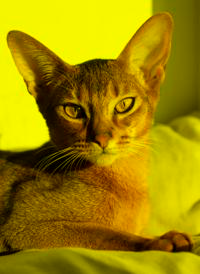

In [31]:
Filter(cat, yellow)

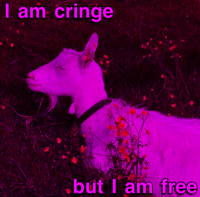

In [32]:
Filter(goat, violet)